# Project Overview

You work for a staffing agency that specializes in finding qualified candidates for development roles. One of your latest clients is growing rapidly and wants to understand what kinds of developers they can hire, and to understand general trends of the technology market. Your organization has access to this __[Stack Overflow dataset](https://static-assets.codecademy.com/Courses/handling-missing-data/stackoverflow-project/developer_dataset.csv.zip?_gl=1*td7n0b*_gcl_au*OTY2OTg2MDg5LjE3MTUzMzAwODY.*_ga*Njc1Nzk1OTg5NC4xNzE1MzMwMDk1*_ga_3LRZM6TM9L*MTcxOTIyNjMzMi45MC4xLjE3MTkyMjczMTUuMC4wLjA.)__, which consists of survey responses by developers all over the world for the last few years.

Your project is to put together several statistical analyses about the community to educate your client about the potential hiring market for their company.

Explore data

You decide to start by performing some Exploratory Data Analysis (EDA). This will provide you with a high-level understanding of the data fields, as well as help you identify which columns have missing data. In this case, you load the dataset into a *pandas* DataFrame and call it *df*. Take a moment to explore which columns you have in the data.

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('developer_dataset.csv')

print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


C:\Users\GregorRowley\AppData\Local\Temp\ipykernel_11612\2380139968.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


At an initial glance, you notice the following kinds of information: A variety of columns that identify the person (RespondentID, Year, Country) Information about their experiences (LanguageWorkedWith, DatabaseWorkedWith, UndergradMajor, etc.) Information about what they might want to do in the future (LanguageDesireNextYear, DatabaseDesireNextYear, etc.)

At this point, you want a good understanding of how much data you have. Since this is a survey where each question is optional, you don’t expect every column to have a full set of data.

Run <a>df.count()</a> to see a row count for each column.

In [2]:
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

Run <a>df.describe</a> to return some summary statistics on the dataset.

In [3]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


### Delete highly missing data

You notice this dataset has a number of columns with a significant amount of missing data. With this much missing data, it is unlikely that any statistical analysis using that data would be accurate and representative of the developers who filled out the survey. Luckily, you recall that you can safely remove columns with ~60% or more missing data.

Calculate the percentage missing data for each column.

In [21]:
# Print out missing percentage of each column

# We can use the ID as our total row count, since every respondent gets a unique ID
maxRows = df["RespondentID"].count()

print("% Missing Data:")
print((1 - df.count() / maxRows) * 100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


Based on the above numbers, you assume that it is safe to remove the following columns:

- NEWJobHunt
- NEWJobHuntResearch
- NEWLearn

In [5]:
df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'],
    axis=1,
    inplace=True)

### Developer Analysis by Country

Start thinking about the questions you want to ask of the data. You decide to investigate the distribution of employment and developer type from a geographical (i.e. Country) perspective.

Both the Employment and DevType fields have missing data, but not a very significant amount, both with less than 10% missing. This is going to be foundational for your analyses moving forward, so you want to ensure that there are no missing data points.

Determine what kind of missing data you have for employment and developer type. One way to do that is check, at a country level, where the data is missing for each field:

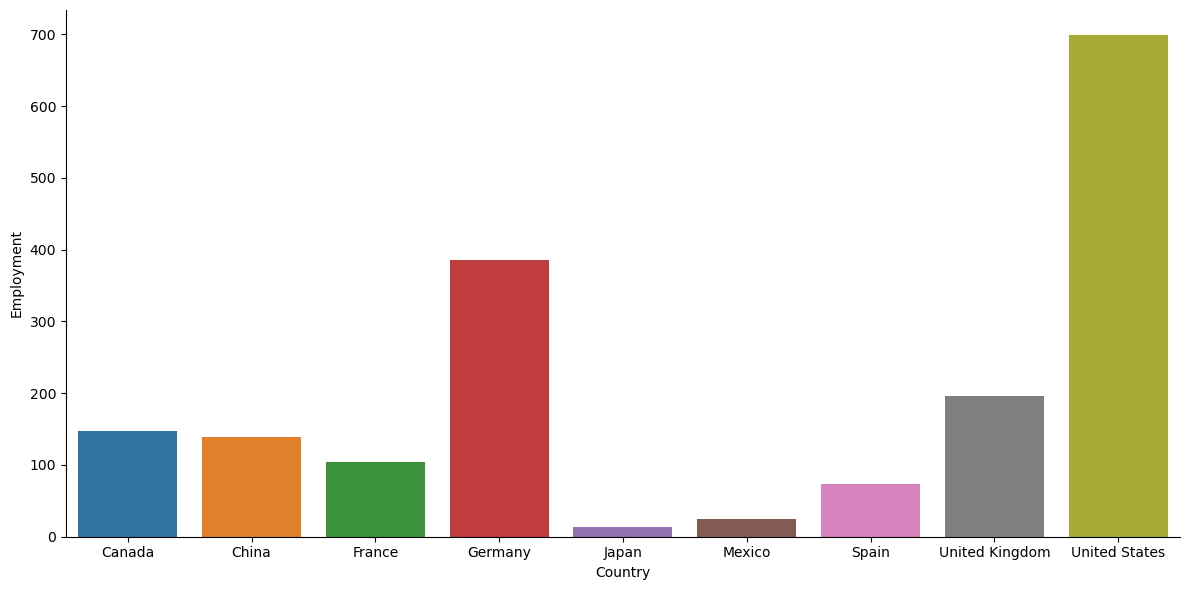

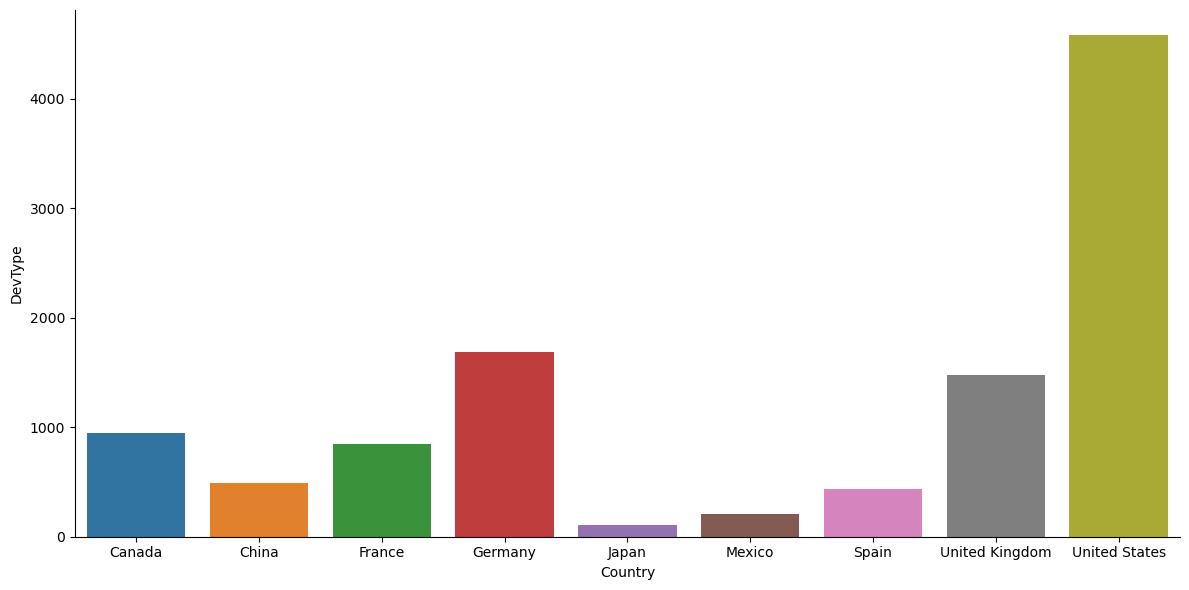

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['RespondentID', 'Country']].groupby('Country').count()

missingData = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()

A = sns.catplot(
      data = missingData, kind = "bar",
      x = "Country", y = "Employment",
      height = 6, aspect = 2)
B = sns.catplot(
      data = missingData, kind = "bar",
      x = "Country", y = "DevType",
      height = 6, aspect = 2
)

As we can see from the above plots, the data doesn’t appear to be missing for any country significantly more than any other. Using your domain knowledge, you understand that the missing data appears to scale with the relative size of each country (e.g. there is more missing data in the United States vs. Japan because there will be more respondents there). You also note that the United States and Germany have significantly more developers (on average) than the other countries, explaining why they have more missing data points.

You determine that the missing data for these two columns can be categorized as **MCAR**. This means you can safely delete the rows that have missing data in these columns! This is a prime example of where you can employ Pairwise Deletion to only delete rows that have missing data for either <a>Employment</a> or <a>DevType</a>:

In [8]:
df.dropna(subset = ['Employment', 'DevType'],
    inplace = True,
    how = 'any')

Now you can analyze the distribution of employment and developer types by country. You decide to aggregate the employment data by key developer roles that align with major parts of the development lifecycle:

- Front-end
- Back-end
- Full-stack
- Mobile development
- Administration roles

C:\Users\GregorRowley\AppData\Local\Temp\ipykernel_11612\3662614205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf["DevType"].str.contains("back-end"), "BackEnd"] = True
C:\Users\GregorRowley\AppData\Local\Temp\ipykernel_11612\3662614205.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  devdf.loc[devdf["DevType"].str.contains("back-end"), "BackEnd"] = True
C:\Users\GregorRowley\AppData\Local\Temp\ipykernel_11612\3662614205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

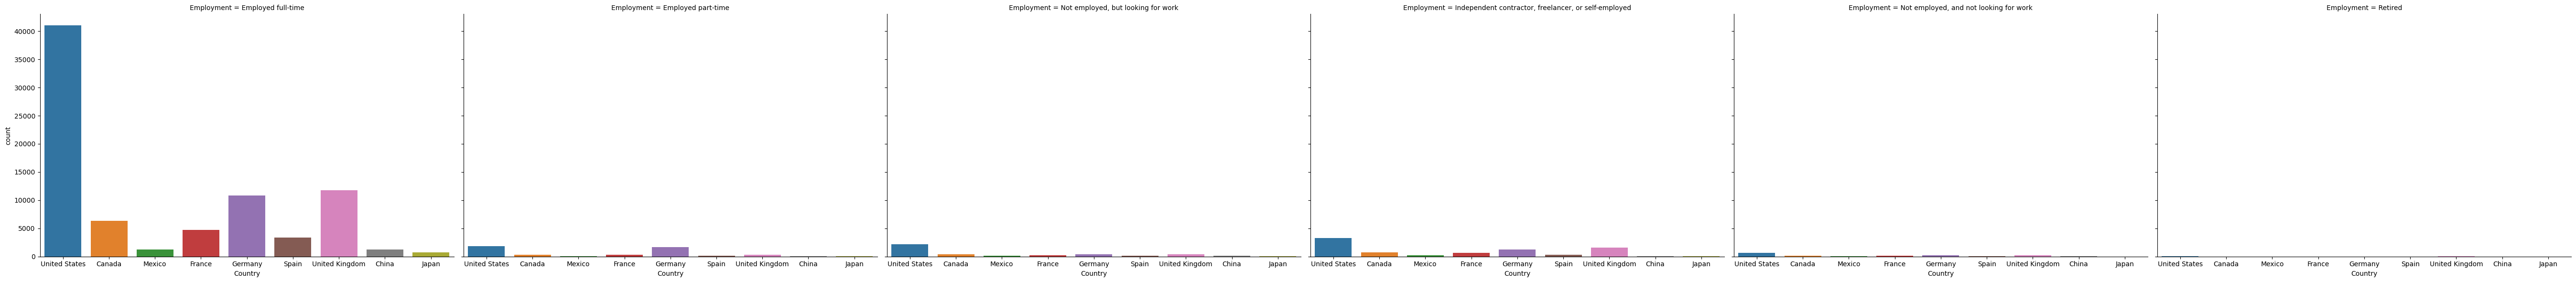

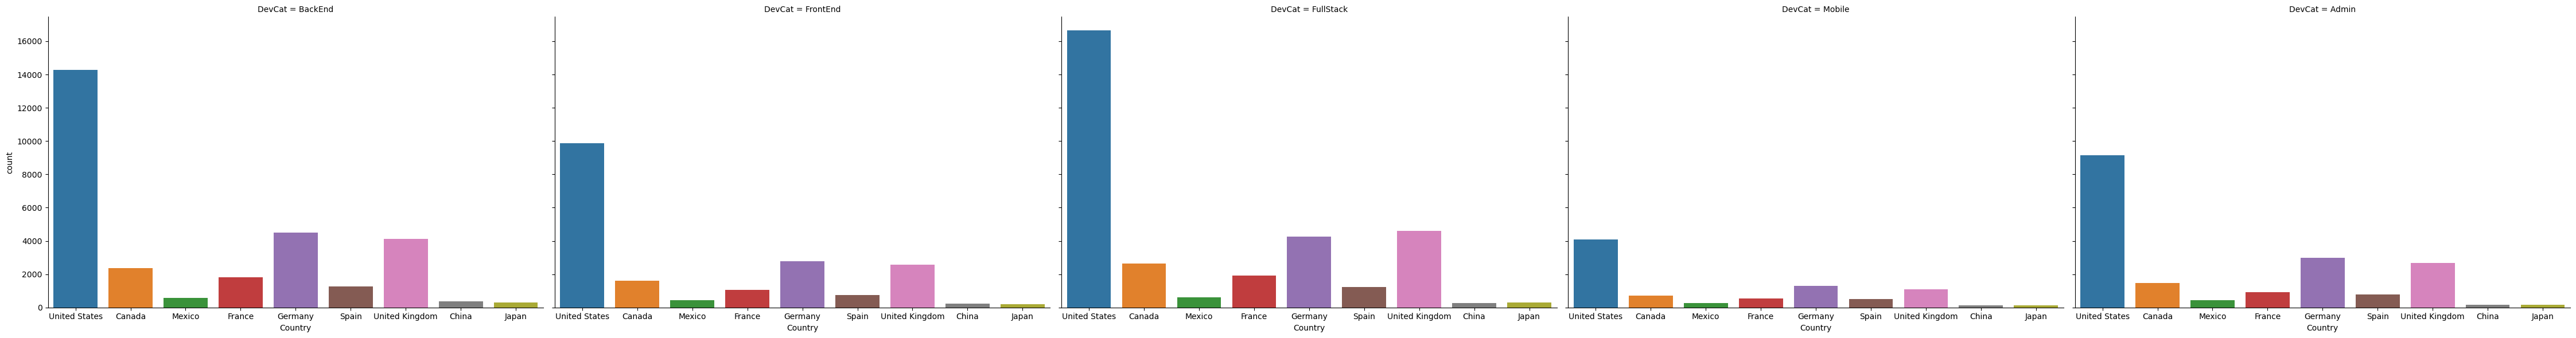

In [11]:
empfig = sns.catplot(
    x="Country", col="Employment", data=df, kind="count", height=6, aspect=1.5
)

# Focus on a few of the key developer types outlined in the Stack Overflow survey
devdf = df[["Country", "DevType"]]
devdf.loc[devdf["DevType"].str.contains("back-end"), "BackEnd"] = True
devdf.loc[devdf["DevType"].str.contains("front-end"), "FrontEnd"] = True
devdf.loc[devdf["DevType"].str.contains("full-stack"), "FullStack"] = True
devdf.loc[devdf["DevType"].str.contains("mobile"), "Mobile"] = True
devdf.loc[devdf["DevType"].str.contains("administrator"), "Admin"] = True

devdf = devdf.melt(
    id_vars=["Country"],
    value_vars=["BackEnd", "FrontEnd", "FullStack", "Mobile", "Admin"],
    var_name="DevCat",
    value_name="DevFlag",
)

devdf.dropna(how="any", inplace=True)

devFig = sns.catplot(
    x="Country", col="DevCat", data=devdf, kind="count", height=6, aspect=1.5
)

You see that the vast majority of respondents are employed full-time. Since these developers are mainly employed, this data will be relevant for a client who wants to see what developers look for in a potential job. You also see that the majority of developers will have skill sets in front-end, back-end, or full-stack development. This is interesting, and shows that the market values developers who can excel in at least a major part of the development lifecycle, if not the entire stack.

### Investigate developer undergraduate majors

You decide to dive into the background for each type of developer to see trends in their educational experience that ultimately led to a career with technology. In particular, you look at the overall trend of majors year over year for respondents. As you saw before, you are missing about 11% of the data for <a>UndergradMajor</a>. Why do you think this data is missing? Could something have happened over the course of these three years? Is the fact that data is missing accurate?

To test your theory, take a look at the distribution of majors over each year:

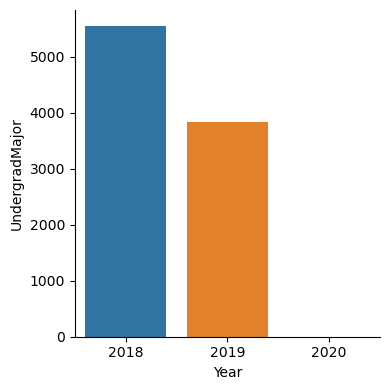

In [12]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(x="Year", y="UndergradMajor",
            data=missingUndergrad, kind="bar",
            height=4, aspect=1);

You see that all of the data for 2020 undergrad majors is filled in, indicating that each participant in these surveys had some level of decision for their undergrad major. For the purposes of your analysis, you are most interested in what major a person ultimately landed on, as this would be the educational background they would carry into a job search. You want to carry that value backwards for each participant to fill in any missing data. This is a great use for one of our Single Imputation techniques: NOCB! Fill in the gaps using NOCB:

In [14]:
# Sort by ID and Year so that each person's data is carried backwards correctly.
df = df.sort_values(['RespondentID', 'Year'])

df['UndergradMajor'].bfill(axis=0, inplace=True)

From here, you analyze the major distribution for each year, using a vertical bar chart visualization:

C:\Users\GregorRowley\AppData\Local\Temp\ipykernel_11612\1722199824.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how="any", inplace=True)
C:\Users\GregorRowley\AppData\Local\Temp\ipykernel_11612\1722199824.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[
C:\Users\GregorRowley\AppData\Local\Temp\ipykernel_11612\1722199824.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dty

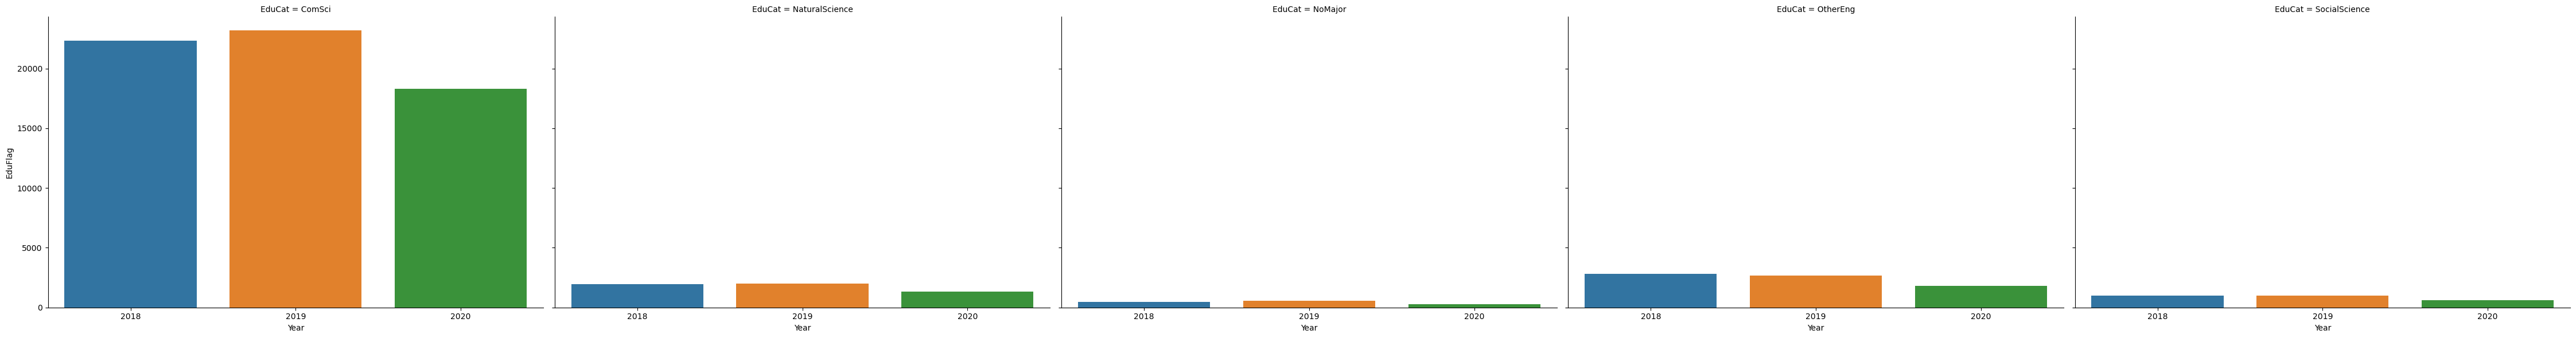

In [22]:
# We will focus on a few of the key major groups outlined in the Stack Overflow survey.
majors = [
    "social science",
    "natural science",
    "computer science",
    "development",
    "another engineering",
    "never declared",
]

edudf = df[["Year", "UndergradMajor"]]
edudf.dropna(how="any", inplace=True)
edudf.loc[
    edudf["UndergradMajor"].str.contains("(?i)social science"), "SocialScience"
] = True
edudf.loc[
    edudf["UndergradMajor"].str.contains("(?i)natural science"), "NaturalScience"
] = True
edudf.loc[edudf["UndergradMajor"].str.contains("(?i)computer science"), "ComSci"] = True
edudf.loc[edudf["UndergradMajor"].str.contains("(?i)development"), "ComSci"] = True
edudf.loc[
    edudf["UndergradMajor"].str.contains("(?i)another engineering"), "OtherEng"
] = True
edudf.loc[edudf["UndergradMajor"].str.contains("(?i)never declared"), "NoMajor"] = True

edudf = edudf.melt(
    id_vars=["Year"],
    value_vars=["SocialScience", "NaturalScience", "ComSci", "OtherEng", "NoMajor"],
    var_name="EduCat",
    value_name="EduFlag",
)

edudf.dropna(how="any", inplace=True)
edudf = edudf.groupby(["Year", "EduCat"]).count().reset_index()

eduFig = sns.catplot(
    x="Year", y="EduFlag", col="EduCat", data=edudf, kind="bar", height=6, aspect=1.5
)

You notice that the vast majority of people who enter the workforce for development have some background in a Computer Science major. Interestingly, however, the number of Computer Science majors significantly declined over the years surveyed, indicating that there could be other majors that have successfully entered the workforce for their desired job. This would require further analysis and could allow an individual to pursue a separate education path and still end up in some kind of developer role.

### Examine the relationship between years of experience and compensation

At this point, you have studied the demographics of developers around the world, from where they live to the education paths they have taken. Now, you turn your focus to the various aspects that would influence the job-hunting process.

Years of experience are an important metric when looking to understand the general skill and technical capabilities of a potential candidate. Compensation is also important for our client to understand what the “going rate” for a particular developer is in today’s market. You might assume that there is a strong correlation between experience and job compensation, making it an excellent hypothesis to explore.

In order to understand a bit about the data for each of these two fields, perform some more exploratory analysis:

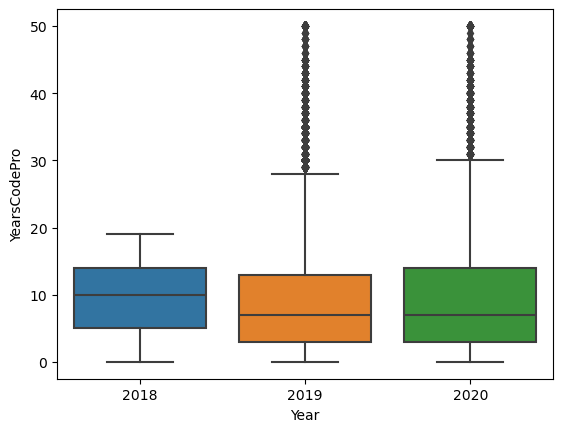

In [23]:
compFields = df[["Year", "YearsCodePro", "ConvertedComp"]]

D = sns.boxplot(x="Year", y="YearsCodePro", data=compFields)

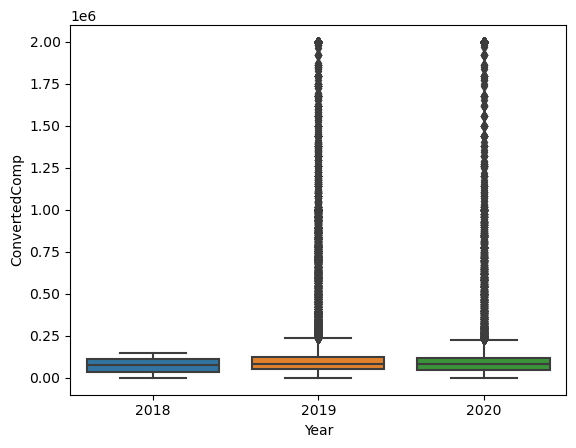

In [24]:
E = sns.boxplot(x="Year", y="ConvertedComp", data=compFields)

You see that although there are some outlier data points for each column, the overall distribution is fairly consistent year-over-year. This indicates that there is a strong correlation between the data points, which should tell a good story about how experience can translate into compensation. Since there is a clear trend with the data points, you decide the best method for filling in the missing data for these two columns is through Multiple Imputation:

In [25]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[["YearsCodePro", "ConvertedComp"]]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit the model to the the test dataset
imp.fit(imputedf)

# Transform the model on the entire dataset
compdf = pd.DataFrame(
    np.round(imp.transform(imputedf), 0), columns=["YearsCodePro", "ConvertedComp"])

In [26]:
compdf.isnull().sum()

YearsCodePro     0
ConvertedComp    0
dtype: int64

The above code will loop through (up to 20 times), and fill in the missing data based on the context provided by the other column. This should create data points that are indicative of the overall trend of the data. Now, you can analyze the relationship between <a>YearsCodePro</a> and <a>CinvertedComp</a> through the use of a boxplot like so:

C:\Users\GregorRowley\AppData\Local\Temp\ipykernel_11612\531884784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf["CodeYearBins"] = pd.qcut(compPlotdf["YearsCodePro"], q=5)
c:\Users\GregorRowley\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

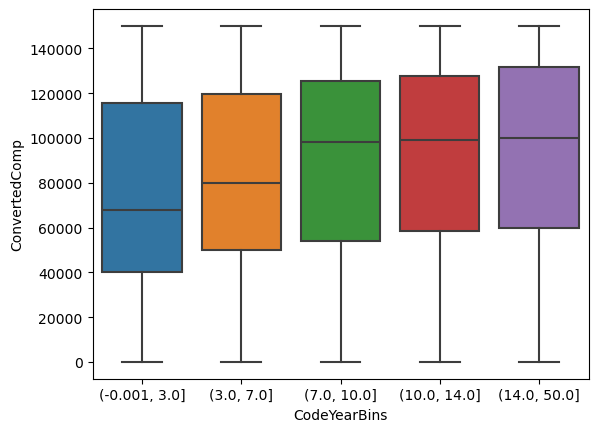

In [28]:
# Reducing our range for viewing simplicity.
compPlotdf = compdf.loc[compdf["ConvertedComp"] <= 150000]
compPlotdf["CodeYearBins"] = pd.qcut(compPlotdf["YearsCodePro"], q=5)

sns.boxplot(x="CodeYearBins", y="ConvertedComp", data=compPlotdf)

The plot above validates your hypothesis from before. While there are high (and low) earning developers at every experience level, experience appears to correlate with compensation. The more experienced a developer was, the more (on average) they were compensated.

### Summary and Results

At this point, we have analyzed information about the developer community from a variety of points of view. Our client understands the global presence of the developer community, their varied backgrounds, and how their experience translates into compensation. Overall, these statistical analyses can guide actions in moving forward with a staffing plan that aligns with your client’s growth plan and technical requirements.

By using a variety of techniques for handling missing data, you were able to reliably curate a cleaner dataset to fuel this set of analyses. These strategies allow you to salvage otherwise messy data, and should help you in the future with other datasets.

In [29]:
df.to_csv('developer_dataset_cleaned.csv', index=False, header=True)